In [32]:
import pandas as pd

In [33]:
df=pd.read_csv("c:/Training/Local Price Tracker and Inflation Montior/data/processed/data.csv")
df.head()

,commodity,unit,date,price
0,Rice,1 Kg,2025-08-13,42.87
1,Wheat,1 Kg,2025-08-13,31.51
2,Atta (Wheat),1 Kg,2025-08-13,36.76
3,Gram Dal(Bharat Dal Adjusted),1 Kg,2025-08-13,83.06
4,Gram Dal,1 Kg,2025-08-13,87.13


In [34]:
df.shape

(351, 4)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   commodity  351 non-null    object 
 1   unit       351 non-null    object 
 2   date       351 non-null    object 
 3   price      351 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.1+ KB


In [36]:
df.describe()

,price
count,351.000000
mean,93.585812
std,106.917232
min,15.850000
25%,41.370000
50%,56.350000
75%,114.250000
max,665.070000


In [37]:
df['date']=pd.to_datetime(df['date'], errors='coerce')
latest_date=df['date'].max()
latest_date


Timestamp('2025-08-13 00:00:00')

In [38]:
one_year_ago = latest_date.replace(year=latest_date.year - 1)
one_year_ago

Timestamp('2024-08-13 00:00:00')

In [39]:
latest_prices = df[df["date"] == latest_date]
latest_prices

,commodity,unit,date,price
0,Rice,1 Kg,2025-08-13,42.87
1,Wheat,1 Kg,2025-08-13,31.51
2,Atta (Wheat),1 Kg,2025-08-13,36.76
3,Gram Dal(Bharat Dal Adjusted),1 Kg,2025-08-13,83.06
4,Gram Dal,1 Kg,2025-08-13,87.13
5,Tur/Arhar Dal,1 Kg,2025-08-13,118.11
6,Urad Dal,1 Kg,2025-08-13,114.40
7,Moong Dal,1 Kg,2025-08-13,110.43
8,Masoor Dal,1 Kg,2025-08-13,89.26
9,Sugar,1 Kg,2025-08-13,46.20


In [40]:
year_back_prices = df[df["date"] == one_year_ago]

In [41]:
df["daily_pct_change"] = df.groupby('commodity')['price'].pct_change()

In [42]:
inflation_df = latest_prices.merge(
    year_back_prices,
    on=["commodity", "unit"],
    suffixes=("_latest", "_year_back")
)
inflation_df['inflation_rate'] = ((inflation_df['price_latest'] - inflation_df['price_year_back']) / inflation_df['price_year_back']) * 100

In [43]:
inflation_df

,commodity,unit,date_latest,price_latest,date_year_back,price_year_back,inflation_rate
0,Rice,1 Kg,2025-08-13,42.87,2024-08-13,43.64,-1.764436
1,Wheat,1 Kg,2025-08-13,31.51,2024-08-13,30.67,2.738833
2,Atta (Wheat),1 Kg,2025-08-13,36.76,2024-08-13,35.62,3.200449
3,Gram Dal(Bharat Dal Adjusted),1 Kg,2025-08-13,83.06,2024-08-13,84.36,-1.541015
4,Gram Dal,1 Kg,2025-08-13,87.13,2024-08-13,88.66,-1.725694
5,Tur/Arhar Dal,1 Kg,2025-08-13,118.11,2024-08-13,165.73,-28.733482
6,Urad Dal,1 Kg,2025-08-13,114.40,2024-08-13,125.26,-8.669966
7,Moong Dal,1 Kg,2025-08-13,110.43,2024-08-13,116.42,-5.145164
8,Masoor Dal,1 Kg,2025-08-13,89.26,2024-08-13,90.22,-1.064066
9,Sugar,1 Kg,2025-08-13,46.20,2024-08-13,44.74,3.263299


In [44]:
top_5_inflation_rate = inflation_df.nlargest(5, 'inflation_rate')

In [45]:
top_5_inflation_rate

,commodity,unit,date_latest,price_latest,date_year_back,price_year_back,inflation_rate
15,Sunflower Oil (Packed),1 Kg,2025-08-13,160.92,2024-08-13,120.46,33.587913
12,Mustard Oil (Packed),1 Kg,2025-08-13,186.69,2024-08-13,139.77,33.569436
34,Coriander (whole),250 gm,2025-08-13,37.16,2024-08-13,28.13,32.100960
16,Palm Oil (Packed),1 Kg,2025-08-13,130.46,2024-08-13,99.15,31.578417
13,Vanaspati (Packed),1 Kg,2025-08-13,156.49,2024-08-13,123.36,26.856355


In [46]:
least_five_inflation_rate = inflation_df.nsmallest(5, 'inflation_rate')
least_five_inflation_rate

,commodity,unit,date_latest,price_latest,date_year_back,price_year_back,inflation_rate
37,Turmeric (powder),50 gm,2025-08-13,16.22,2024-08-13,31.35,-48.261563
21,Onion,1 Kg,2025-08-13,28.11,2024-08-13,43.74,-35.733882
35,Cummin Seed (whole),100 gm,2025-08-13,41.95,2024-08-13,63.40,-33.832808
20,Potato,1 Kg,2025-08-13,25.69,2024-08-13,37.18,-30.903712
36,Red Chillies (whole),100 gm,2025-08-13,27.85,2024-08-13,39.86,-30.130457


In [47]:
plotting_df = inflation_df[['commodity', 'inflation_rate']]

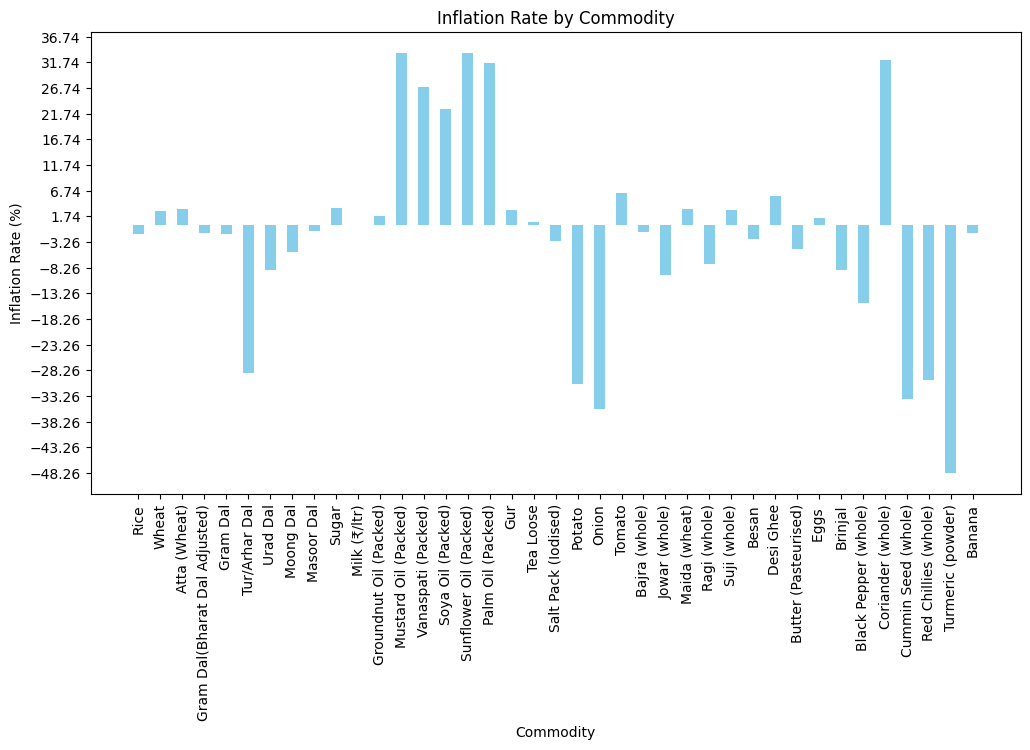

In [48]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(12, 6))
plt.bar(plotting_df['commodity'], plotting_df['inflation_rate'], width=0.5, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Commodity')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate by Commodity')

# Set y-axis ticks with a step of 5 (adjust as needed)
y_min = plotting_df['inflation_rate'].min()
y_max = plotting_df['inflation_rate'].max()
plt.yticks(np.arange(y_min, y_max + 5, 5))


plt.show()

In [49]:
previous_date=latest_date.replace(day=latest_date.day-1)
previous_date

Timestamp('2025-08-12 00:00:00')

In [50]:
current_price=df[df['date'] == latest_date]
current_price

,commodity,unit,date,price,daily_pct_change
0,Rice,1 Kg,2025-08-13,42.87,NaN
1,Wheat,1 Kg,2025-08-13,31.51,NaN
2,Atta (Wheat),1 Kg,2025-08-13,36.76,NaN
3,Gram Dal(Bharat Dal Adjusted),1 Kg,2025-08-13,83.06,NaN
4,Gram Dal,1 Kg,2025-08-13,87.13,NaN
5,Tur/Arhar Dal,1 Kg,2025-08-13,118.11,NaN
6,Urad Dal,1 Kg,2025-08-13,114.40,NaN
7,Moong Dal,1 Kg,2025-08-13,110.43,NaN
8,Masoor Dal,1 Kg,2025-08-13,89.26,NaN
9,Sugar,1 Kg,2025-08-13,46.20,NaN


In [51]:
previous_price=df[df['date'] == previous_date]
previous_price

,commodity,unit,date,price,daily_pct_change
39,Rice,1 Kg,2025-08-12,42.95,0.001866
40,Wheat,1 Kg,2025-08-12,31.59,0.002539
41,Atta (Wheat),1 Kg,2025-08-12,36.88,0.003264
42,Gram Dal(Bharat Dal Adjusted),1 Kg,2025-08-12,83.21,0.001806
43,Gram Dal,1 Kg,2025-08-12,87.31,0.002066
44,Tur/Arhar Dal,1 Kg,2025-08-12,118.32,0.001778
45,Urad Dal,1 Kg,2025-08-12,114.43,0.000262
46,Moong Dal,1 Kg,2025-08-12,110.55,0.001087
47,Masoor Dal,1 Kg,2025-08-12,89.26,0.000000
48,Sugar,1 Kg,2025-08-12,46.19,-0.000216


In [52]:
inflation_df =current_price.merge(previous_price, on=['commodity','unit'], suffixes=('_current', '_previous'))

In [53]:
inflation_df.drop(columns=['date_current', 'date_previous','daily_pct_change_current','daily_pct_change_previous'], inplace=True)

In [54]:
inflation_df

,commodity,unit,price_current,price_previous
0,Rice,1 Kg,42.87,42.95
1,Wheat,1 Kg,31.51,31.59
2,Atta (Wheat),1 Kg,36.76,36.88
3,Gram Dal(Bharat Dal Adjusted),1 Kg,83.06,83.21
4,Gram Dal,1 Kg,87.13,87.31
5,Tur/Arhar Dal,1 Kg,118.11,118.32
6,Urad Dal,1 Kg,114.40,114.43
7,Moong Dal,1 Kg,110.43,110.55
8,Masoor Dal,1 Kg,89.26,89.26
9,Sugar,1 Kg,46.20,46.19


In [55]:
inflation_df['inflation_rate'] =((inflation_df['price_current'] - inflation_df['price_previous']) / inflation_df['price_previous']) * 100
inflation_df

,commodity,unit,price_current,price_previous,inflation_rate
0,Rice,1 Kg,42.87,42.95,-0.186263
1,Wheat,1 Kg,31.51,31.59,-0.253245
2,Atta (Wheat),1 Kg,36.76,36.88,-0.325380
3,Gram Dal(Bharat Dal Adjusted),1 Kg,83.06,83.21,-0.180267
4,Gram Dal,1 Kg,87.13,87.31,-0.206162
5,Tur/Arhar Dal,1 Kg,118.11,118.32,-0.177485
6,Urad Dal,1 Kg,114.40,114.43,-0.026217
7,Moong Dal,1 Kg,110.43,110.55,-0.108548
8,Masoor Dal,1 Kg,89.26,89.26,0.000000
9,Sugar,1 Kg,46.20,46.19,0.021650


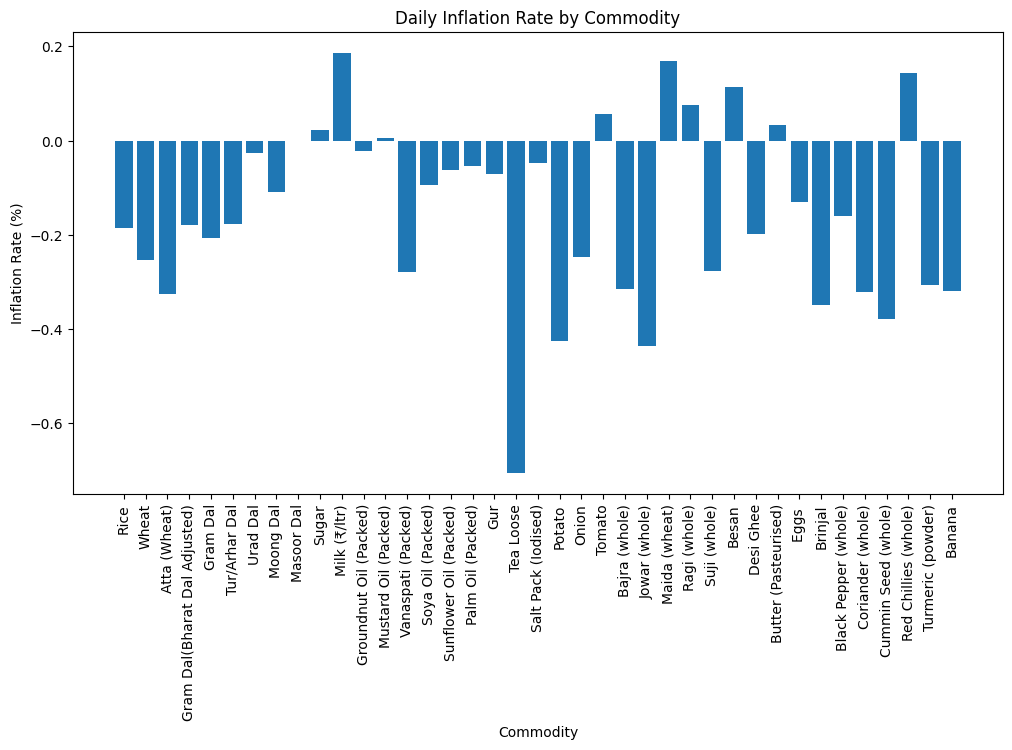

([<matplotlib.axis.YTick at 0x214f92fda30>,
 [Text(0, -0.706493886814557, '−0.706'), Text(0, 4.293506113185443, '4.294')])

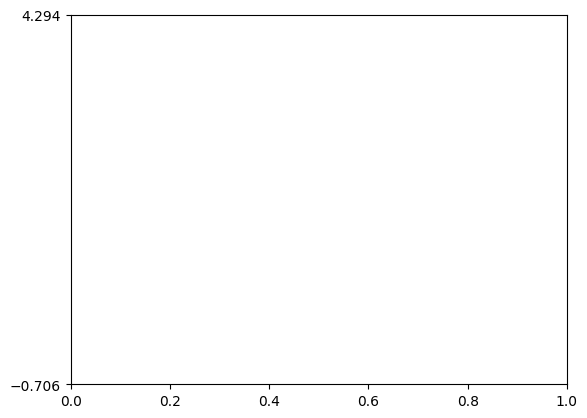

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(inflation_df['commodity'], inflation_df['inflation_rate'])
plt.xticks(rotation=90)
plt.xlabel('Commodity')
plt.ylabel('Inflation Rate (%)')
plt.title('Daily Inflation Rate by Commodity')
plt.show()

# Set y-axis ticks with a step of 5 (adjust as needed)
y_min = inflation_df['inflation_rate'].min()
y_max = inflation_df['inflation_rate'].max()
plt.yticks(np.arange(y_min, y_max + 5, 5))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Wheat'),
  Text(2, 0, 'Atta (Wheat)'),
  Text(3, 0, 'Gram Dal(Bharat Dal Adjusted)'),
  Text(4, 0, 'Gram Dal'),
  Text(5, 0, 'Tur/Arhar Dal'),
  Text(6, 0, 'Urad Dal'),
  Text(7, 0, 'Moong Dal'),
  Text(8, 0, 'Masoor Dal'),
  Text(9, 0, 'Sugar'),
  Text(10, 0, 'Milk (₹/ltr)'),
  Text(11, 0, 'Groundnut Oil (Packed)'),
  Text(12, 0, 'Mustard Oil (Packed)'),
  Text(13, 0, 'Vanaspati (Packed)'),
  Text(14, 0, 'Soya Oil (Packed)'),
  Text(15, 0, 'Sunflower Oil (Packed)'),
  Text(16, 0, 'Palm Oil (Packed)'),
  Text(17, 0, 'Gur'),
  Text(18, 0, 'Tea Loose'),
  Text(19, 0, 'Salt Pack (Iodised)'),
  Text(20, 0, 'Potato'),
  Text(21, 0, 'Onion'),
  Text(22, 0, 'Tomato'),
  Text(23, 0, 'Bajra (whole)'),
  Text(24, 0, 'Jowar (whole)'),
  Tex

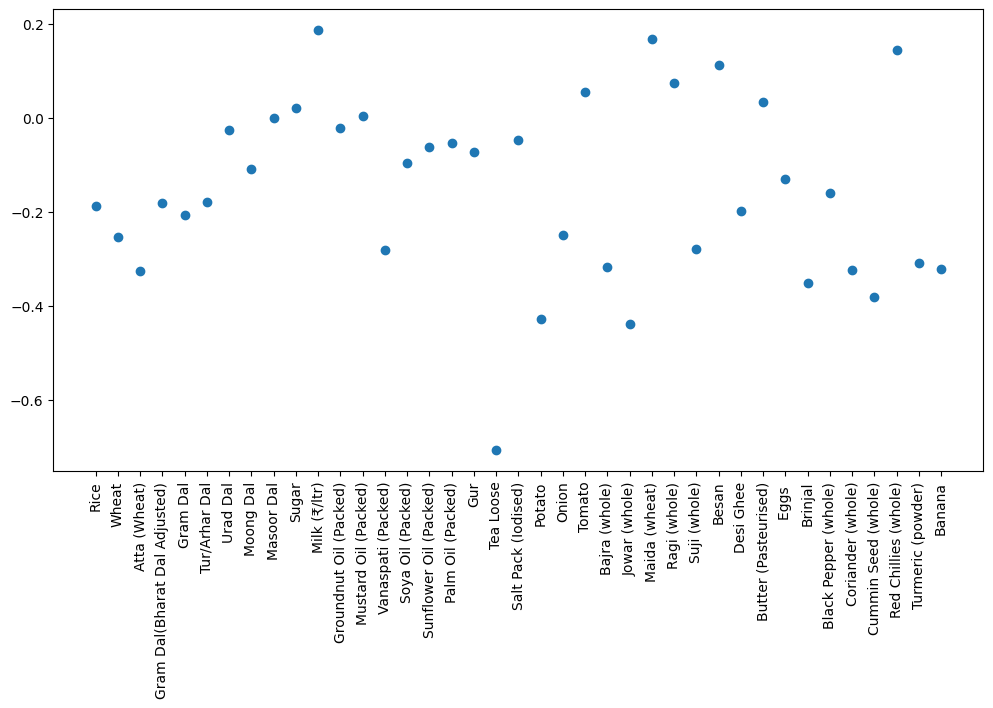

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(inflation_df['commodity'], inflation_df['inflation_rate'])
plt.xticks(rotation=90)

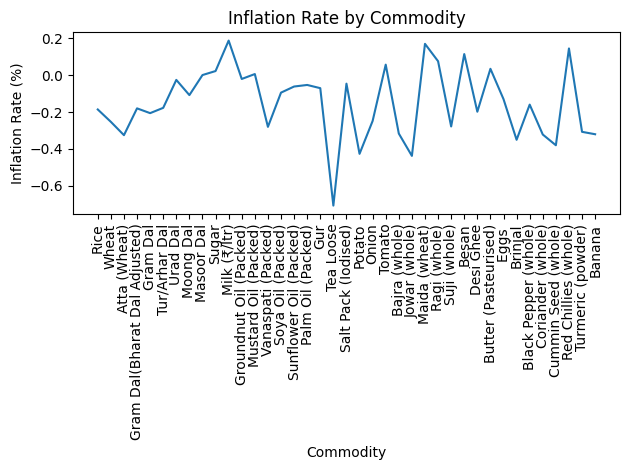

In [65]:
import seaborn as sns
sns.lineplot(data=inflation_df, x='commodity', y='inflation_rate')
plt.xticks(rotation=90)
plt.xlabel('Commodity')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate by Commodity')

plt.tight_layout()
plt.show()

